Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import yaml
from datetime import datetime, timedelta
import time

Generating a list of dates from November 2024 back to November 2023

In [9]:
def get_list_of_dates(
    start=datetime.today() - timedelta(weeks=50),
    end=datetime.today(),
    frequency="W"
  ):
  """
  Generate a list of dates
  """

  date_list = pd.date_range(start, end, freq=frequency)

  date_list_str = [x.strftime("%Y-%m-%d") for x in date_list]
  return date_list_str

Uploading my New York Times Developer API key as a Secrets YAML file

In [10]:
def _get_api_key(path="secrets.yaml"):
  """
  Get the API key from the secrets file
  """
  with open(path, "r") as stream:
    secrets = yaml.safe_load(stream)
  nyt_api_key = secrets["API"]["NYT"]
  return nyt_api_key


Generating a request url for the NYT API to retrieve the Best-Seller lists

In [11]:
def generate_request(list="fiction", date="current"):
  """
  Generate the API request url
  """

  base = "https://api.nytimes.com/svc/books/v3"

  if list == "fiction":
      list_spec = f"/lists/{date}/combined-print-and-e-book-fiction.json"
  elif list == "non-fiction":
      list_spec = f"/lists/{date}/combined-print-and-e-book-nonfiction.json"
  else:
      list_spec = f"/lists/{date}/{list}.json"

  nyt_api_key = _get_api_key()

  api_url = f"{base}{list_spec}?api-key={nyt_api_key}"

  return api_url

Extracting the data from the Best-Seller lists from the NYT API

In [12]:
def api_request(list="fiction", date="current"):
  """
  Extract the data from the API
  """

  url = generate_request(list=list, date=date)

  response = requests.get(url)
  json_raw = response.json()

  nyt_list_json = json_raw["results"]["books"]
  list_publish_date = json_raw["results"]["published_date"]

  df_all = pd.DataFrame().from_dict(nyt_list_json)

  cols_to_drop = [
      "book_image",
      "book_image_width",
      "book_image_height",
      "isbns",
      "buy_links",
  ]

  df = df_all.drop(columns=cols_to_drop).copy()
  df["title"] = df["title"].str.title()
  df["rank_last_week"].replace({0: np.nan}, inplace=True)
  df["list_publication_date"] = list_publish_date

  df_out = df[["rank", "rank_last_week", "title", "author",
    "weeks_on_list", "list_publication_date"]].copy()

  return df_out

Downloading the Nov 2024 and Nov 2023 Best-Seller lists as a CSV file

In [ ]:
def download_bestseller_lists(
      list_type="fiction",
      #start_date=datetime.today() - timedelta(weeks=5*52),
      #end_date=datetime.today(),
      save=True,
      return_df=False
  ):
  """
  Download the Best Seller list from a given date
  """
  #date_list = get_list_of_dates(start=start_date, end=end_date)
  date_list = get_list_of_dates(start=datetime(2023, 11, 1), end=datetime(2024, 11, 1))

  n_dates = len(date_list)
  print(f"Number of requests: {n_dates}")
  print(f"Estimated download time: {n_dates * 12}s or {n_dates * 12 / 60}min")

  df_nyt_list = pd.DataFrame()
  for i in date_list:
      print(f"Extracting {list_type} list at date {i}")
      df_nyt_list = pd.concat([df_nyt_list, api_request(list=list_type, date=i)])
      time.sleep(12)

  if save:
    df_nyt_list.to_csv(f"./nyt_list_{list_type}.csv", index=False)

  if return_df:
    return df_nyt_list

download_bestseller_lists(list_type="fiction")

Number of requests: 52
Estimated download time: 624s or 10.4min
Extracting fiction list at date 2023-11-05


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-11-12


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-11-19


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-11-26


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-12-03


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-12-10


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-12-17


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-12-24


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2023-12-31


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-01-07


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-01-14


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-01-21


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-01-28


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-02-04


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-02-11


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-02-18


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-02-25


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-03-03


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-03-10


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-03-17


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-03-24


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-03-31


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-04-07


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-04-14


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-04-21


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-04-28


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-05-05


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-05-12


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-05-19


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-05-26


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-06-02


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-06-09


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-06-16


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-06-23


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-06-30


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-07-07


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-07-14


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-07-21


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-07-28


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-08-04


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-08-11


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-08-18


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-08-25


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-09-01


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-09-08


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-09-15


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-09-22


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-09-29


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-10-06


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-10-13


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-10-20


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


Extracting fiction list at date 2024-10-27


<ipython-input-12-68150cf3fff2>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rank_last_week"].replace({0: np.nan}, inplace=True)


********************************************************************************************

Creating barplot of the Fiction Best-Sellers List from Nov 2023 to Nov 2024

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Loading best-sellers data from the CSV file
data = pd.read_csv("nyt_list_fiction.csv")
print(data)

     rank  rank_last_week                        title  \
0       1             NaN                 The Exchange   
1       2             1.0                  Fourth Wing   
2       3             4.0         Lessons In Chemistry   
3       4             NaN           Two Twisted Crowns   
4       5             3.0                     Wildfire   
..    ...             ...                          ...   
775    11            11.0              It Ends With Us   
776    12             4.0             Demon Copperhead   
777    13             NaN  The Last One At The Wedding   
778    14             5.0              Lies He Told Me   
779    15             NaN       The Housemaid'S Secret   

                              author  weeks_on_list list_publication_date  
0                       John Grisham              1            2023-11-05  
1                     Rebecca Yarros             25            2023-11-05  
2                      Bonnie Garmus             50            2023-11-05  

In [19]:
# Processing data to get counts/labels for the top 20 books
data_summary = (
    data.groupby(['author', 'title'])
    .size()
    .reset_index(name='n_weeks_on_list')
    .assign(book_label=lambda x: x['author'] + " - " + x['title'])
    .nlargest(20, 'n_weeks_on_list')
)

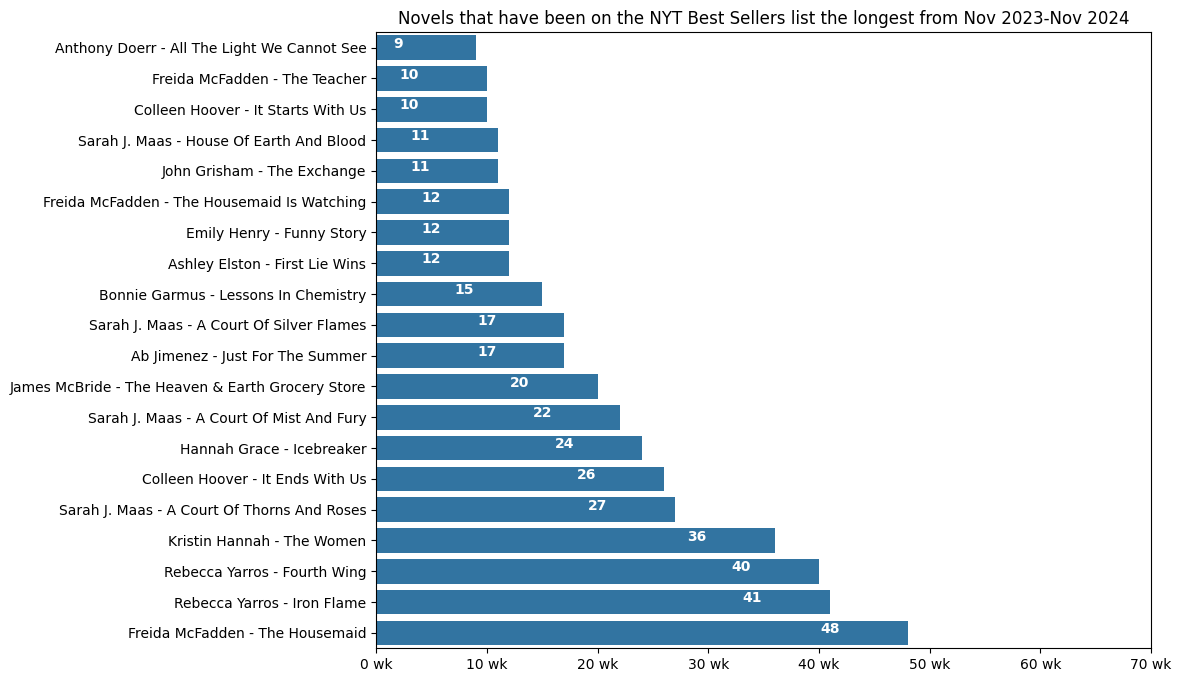

In [ ]:
# Creating bar plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=data_summary,
    x='n_weeks_on_list',
    y='book_label',     
    legend=False             
)

# Adding text labels on the bars
for index, value in enumerate(data_summary['n_weeks_on_list']):
    plt.text(value - 7, index, str(value), color="white", ha="center", fontweight="bold")

plt.title("Novels that have been on the NYT Best Sellers list the longest from Nov 2023-Nov 2024")
plt.xlabel(None)
plt.ylabel(None)
plt.gca().invert_yaxis()  

plt.xlim(0, data_summary['n_weeks_on_list'].max() + 20)
plt.xticks(ticks=plt.xticks()[0], labels=[f"{int(x)} wk" for x in plt.xticks()[0]])

plt.grid(axis='y', linestyle='')

plt.show()

Creating barplot of authors with the most Fiction Best-Sellers from Nov 2023 to Nov 2024

In [ ]:
# Processing data to get top 10 books per author
data_summary = (
    data[['author', 'title']]
    .drop_duplicates()  
    .groupby('author')
    .size()
    .reset_index(name='n_books_in_list')
    .nlargest(10, 'n_books_in_list') 
)

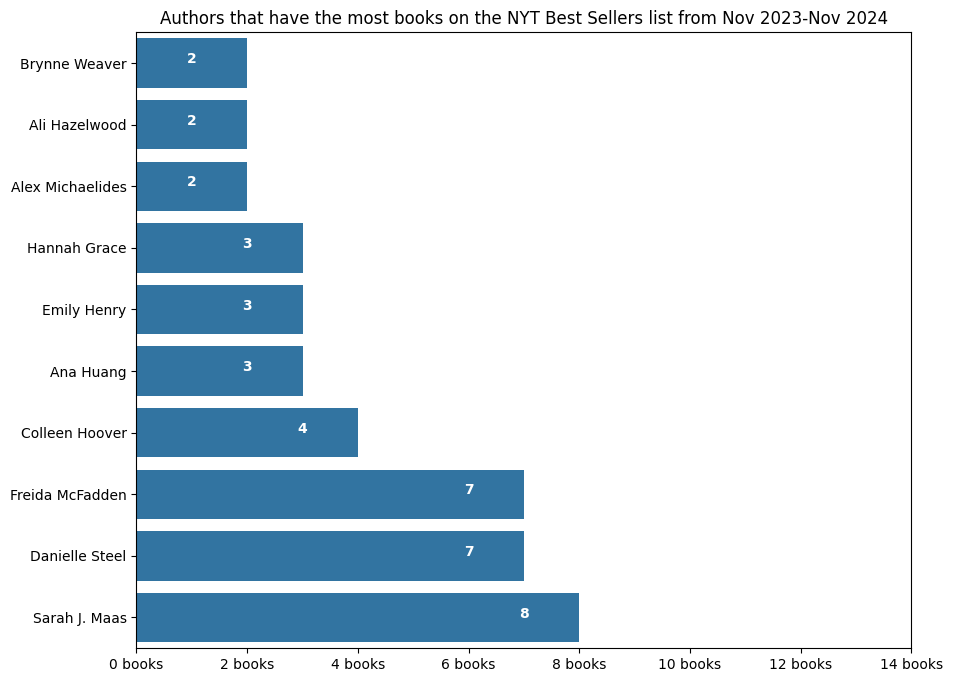

In [ ]:
# Creating bar plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=data_summary,
    x='n_books_in_list',
    y='author'
)

# Adding text labels on the bars
for index, value in enumerate(data_summary['n_books_in_list']):
    plt.text(value - 1, index, str(value), color="white", ha="center", fontweight="bold")

plt.title("Authors that have the most books on the NYT Best Sellers list from Nov 2023-Nov 2024")
plt.xlabel(None)
plt.ylabel(None)
plt.gca().invert_yaxis() 

plt.xlim(0, data_summary['n_books_in_list'].max() + 5)
plt.xticks(ticks=plt.xticks()[0], labels=[f"{int(x)} books" for x in plt.xticks()[0]])

plt.grid(axis='y', linestyle='')

plt.show()